# 파일 가져오기

In [15]:
import pandas as pd 

# skincare_top30
#긍/부/중 문장 리스트 파일 가져오기
top_crc3_positive_list_df = pd.read_excel(r"C:\Users\82108\Desktop\final\skincare_top_crc3_positive_list.xlsx")
top_crc3_negative_list_df = pd.read_excel(r"C:\Users\82108\Desktop\final\skincare_top_crc3_negative_list.xlsx")
top_crc3_neutral_list_df = pd.read_excel(r"C:\Users\82108\Desktop\final\skincare_top_crc3_neutral_list.xlsx")

In [16]:
top_crc3_neutral_list_df

,text
0,진정 사 보 너무
1,여름 쓰 건조 않
2,벌써 통
3,휘뚜루마뚜루 바르 레틴올 입 문재인 아이템
4,기획 구성 늘
...,...
58296,로션 크림 꾸덕꾸덕 이것 훨씬 묽
58297,속 건조 주 자꾸 사 되
58298,세일 사 더 세일
58299,자극 없이 순하 또 구매


# 빈도분석
- from collenctions import Counter
    - top_crc3_positive_words_freq_df
    - top_crc3_negative_words_freq_df
    - top_crc3_neutral_words_freq_df

In [17]:
from collections import Counter


# 직접적인 단어 빈도 계산
# 텍스트를 공백 기준으로 분할하여 모든 단어를 리스트로 만듦
top_crc3_positive_words = top_crc3_positive_list_df['text'].str.split().sum()
top_crc3_negative_words = top_crc3_negative_list_df['text'].str.split().sum()
top_crc3_neutral_words = top_crc3_neutral_list_df['text'].str.split().explode().tolist()

# 단어들의 빈도를 계산
top_crc3_positive_words_freq = Counter(top_crc3_positive_words)
top_crc3_negative_words_freq = Counter(top_crc3_negative_words)
top_crc3_neutral_words_freq = Counter(top_crc3_neutral_words)

# 빈도 데이터를 데이터프레임으로 변환하여 정렬
top_crc3_positive_words_freq_df = pd.DataFrame(top_crc3_positive_words_freq.items(), columns=['단어', '빈도']).sort_values(by='빈도', ascending=False).reset_index(drop=True)
top_crc3_negative_words_freq_df = pd.DataFrame(top_crc3_negative_words_freq.items(), columns=['단어', '빈도']).sort_values(by='빈도', ascending=False).reset_index(drop=True)
top_crc3_neutral_words_freq_df = pd.DataFrame(top_crc3_neutral_words_freq.items(), columns=['단어', '빈도']).sort_values(by='빈도', ascending=False).reset_index(drop=True)

# 상위 10개 단어 출력
top_crc3_positive_words_freq_df.head(30)


,단어,빈도
0,잘,8565
1,쓰,4799
2,있,4153
3,사용,3380
4,피부,2718
5,보,2490
6,같,2483
7,되,2482
8,바르,2013
9,만족,1954


In [18]:
import pandas as pd

#crc
# 행 선택
negative_top_30 = top_crc3_negative_words_freq_df[0:30]
positive_top_30 = top_crc3_positive_words_freq_df[0:30]

# 부정 프레임과 긍정 프레임의 단어 리스트 추출
negative_words = set(negative_top_30['단어'])  
positive_words = set(positive_top_30['단어'])  

# 중복 단어 필터링
common_words = negative_words & positive_words

# 중복 단어를 제외한 부정 단어 리스트
unique_negative_df = negative_top_30[~negative_top_30['단어'].isin(common_words)]
unique_positive_df = positive_top_30[~positive_top_30['단어'].isin(common_words)]

# 고유 부정 단어 리스트를 빈도 순으로 정렬
unique_negative_df_sorted = unique_negative_df.sort_values(by='빈도', ascending=False)

# 고유 긍정 단어 리스트를 빈도 순으로 정렬
unique_positive_df_sorted = unique_positive_df.sort_values(by='빈도', ascending=False)

# 결과 출력
print("Skincare_top 고유 부정 단어 리스트:")
print(unique_negative_df_sorted['단어'].tolist())

print("Skincare_top 고유 긍정 단어 리스트:")
print(unique_positive_df_sorted['단어'].tolist())


Skincare_top 고유 부정 단어 리스트:
['부족', '수분', '지성', '부담', '없이', '여름', '걱정', '나', '수']
Skincare_top 고유 긍정 단어 리스트:
['만족', '꾸준히', '효과', '진정', '흡수', '맞', '사', '모르', '화장']


In [19]:
# #crc
# # 행 선택
# negative_top_30 = top_crc3_negative_words_freq_df[0:30]
# positive_top_30 = top_crc3_positive_words_freq_df[0:30]

# # 부정 프레임과 긍정 프레임의 단어 리스트 추출
# negative_words = set(negative_top_30['단어'])  
# positive_words = set(positive_top_30['단어'])  

# # 중복 단어만 필터링
# common_words = negative_words & positive_words

# common_negative_df = negative_top_30[negative_top_30['단어'].isin(common_words)]
# common_positive_df = positive_top_30[positive_top_30['단어'].isin(common_words)]

# # 중복 단어를 제외한 데이터프레임 필터링
# filtered_negative_df = negative_top_30[~negative_top_30['단어'].isin(common_words)]
# filtered_positive_df = positive_top_30[~positive_top_30['단어'].isin(common_words)]

# # 결과 출력
# print("두 데이터프레임에 공통으로 있는 단어:")
# print(pd.concat([common_negative_df, common_positive_df], axis=1))

In [20]:
# # crc
# print("\n중복 단어를 제외한 긍정 단어 빈도:")
# print(filtered_positive_df)

In [21]:
# # crc
# print("\n중복 단어를 제외한 부정 단어 빈도:")
# print(filtered_negative_df)

# word cloud

## 데이터프레임 가져오고 불필요한 단어 제거

## 부정

In [71]:
#부정
unique_negative_df_sorted

,단어,빈도
1,부족,871
2,수분,866
4,지성,783
8,부담,559
12,없이,402
21,여름,285
22,걱정,280
24,나,250
25,수,250


In [72]:
#'수'처럼 불필요한 단어 제거
df_word = unique_negative_df_sorted.iloc[:7,:]
df_word

,단어,빈도
1,부족,871
2,수분,866
4,지성,783
8,부담,559
12,없이,402
21,여름,285
22,걱정,280


## 워드클라우드 만들기

In [73]:
# DataFrame -> Dictionary
dic_word = df_word.set_index('단어').to_dict()['빈도']
dic_word

{'부족': 871, '수분': 866, '지성': 783, '부담': 559, '없이': 402, '여름': 285, '걱정': 280}

In [33]:
# %pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### 색 하나만 (O)

In [45]:
# import numpy as np
# # 글자색 지정 함수
# def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
#     # 색상 두 개 지정
#     hsl_colors = [
#         "hsl(77, 63%, 51%)",  # 녹색계열
#         "hsl(1, 80%, 72%)"    # 붉은계열
#     ]
#     # 두 색상 중 하나를 단어마다 랜덤으로 선택
#     return np.random.choice(hsl_colors)

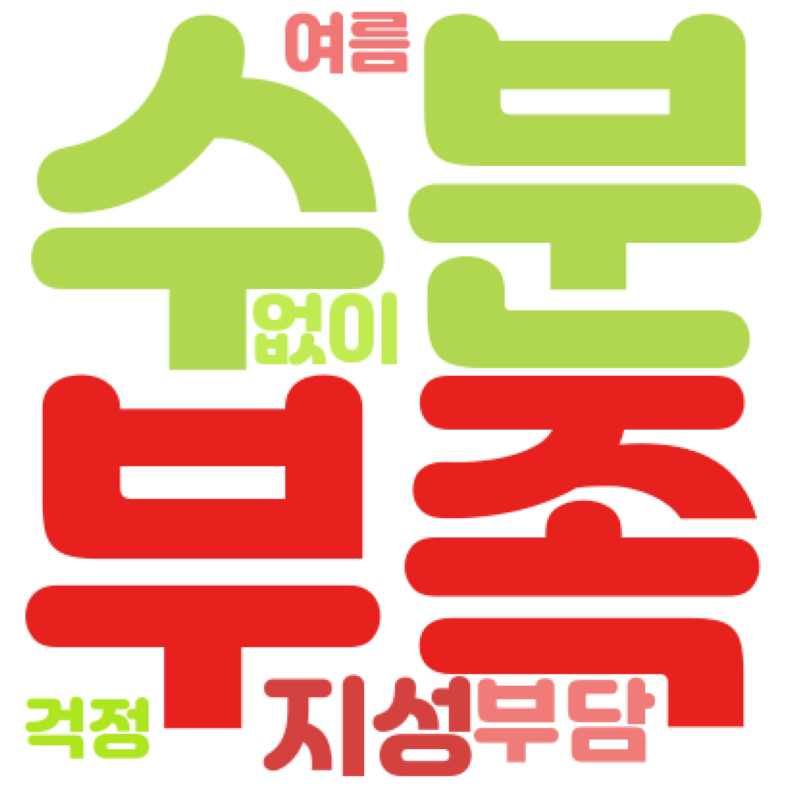

In [74]:
# 채택!!
import numpy as np
from wordcloud import WordCloud #워드클라우드 제작 라이브러리
import matplotlib.pyplot as plt  #워드클라우드 시각화 라이브러리

# 워드클라우드에서 각 단어에 적용할 색상을 결정하는 함수
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 색조(hue)를 50에서 100 사이의 랜덤 값으로 설정
    hue_choices = [77,1]    #np.random.randint(50, 100)   # 색상의 기본 톤
    hue = np.random.choice(hue_choices)
    # 채도(saturation)을 63, 80으로 지정
    saturation_choices = [63,80]
    saturation = np.random.choice(saturation_choices)
    
    # 밝기는 랜덤 범위로 설정
    lightness = np.random.randint(50, 80)   # 50%에서 80% 사이의 랜덤 밝기
    
    # hsl 형식으로 색상 값을 반환
    return f"hsl({hue}, {saturation}%, {lightness}%)"

font_path=r"C:\대학교\학생성장지원시스템\(탈잉)실무에 가장 많이 쓰는 PPT 디자인\Jalnan.ttf"

#wordcloud 함수 사용
wc = WordCloud(random_state=42,font_path= font_path , width = 400,
               height = 400, background_color = 'white', color_func = color_func )
img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) #크기 지정하기
plt.axis('off') #축 없애기
plt.imshow(img_wordcloud) #결과 보여주기
plt.savefig('Skincare_top_negative_wordcloud') #파일 저장

### 색 두 개 (X)

In [59]:
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 워드클라우드에서 각 단어에 적용할 색상을 결정하는 함수
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # '단어'에 대응하는 '빈도' 값 가져오기
    frequency = kwargs.get('frequency', 1)  # 빈도 값이 전달되지 않을 경우 기본값 1 설정
    
    # 녹색과 붉은색 계열의 hue, saturation 값을 정의
    green_hue, green_saturation = 77, 63  # 녹색 계열
    red_hue, red_saturation = 1, 80  # 붉은 계열
    
    # 빈도가 클수록 녹색 계열로, 작을수록 붉은 계열로 변환되도록 가중치 계산
    max_frequency = max(dic_word.values())  # 최대 빈도 값 찾기
    min_frequency = min(dic_word.values())  # 최소 빈도 값 찾기
    normalized_freq = (frequency - min_frequency) / (max_frequency - min_frequency)  # 빈도 값을 0~1로 정규화
    
    hue = np.interp(normalized_freq, [0, 1], [red_hue, green_hue])
    saturation = np.interp(normalized_freq, [0, 1], [red_saturation, green_saturation])
    
    # 밝기는 랜덤하게 설정 (빈도에 따라 조금씩 변화할 수도 있음)
    lightness = np.random.randint(50, 80)
    
    # 선택된 hue, saturation, 랜덤 밝기를 사용하여 hsl 값 반환
    return f"hsl({int(hue)}, {int(saturation)}%, {lightness}%)"

font_path=r"C:\대학교\학생성장지원시스템\(탈잉)실무에 가장 많이 쓰는 PPT 디자인\Jalnan.ttf"

# 워드클라우드 생성 (폰트 경로와 색상 함수 적용)
wc = WordCloud(random_state=42, font_path=font_path, 
               width=400, height=400, background_color='white', color_func=lambda *args, **kwargs: color_func(*args, frequency=dic_word[kwargs['word']], **kwargs))

# 단어 빈도수를 바탕으로 워드클라우드 생성
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 생성된 워드클라우드 시각화
plt.figure(figsize=(10, 10))  # 이미지 크기 설정
plt.axis('off')  # 축 표시 제거
plt.imshow(img_wordcloud)  # 워드클라우드 이미지 표시
plt.show()  # 워드클라우드 창 띄우기


KeyError: 'word'

## 긍정

In [75]:
# 긍정
# 불필요한 단어 제거
df_word2 = unique_positive_df_sorted.drop(index=[20,21,26])

In [76]:
# DataFrame -> Dictionary
dic_word2 = df_word2.set_index('단어').to_dict()['빈도']
dic_word2

{'만족': 1954, '꾸준히': 1760, '효과': 1318, '진정': 1068, '흡수': 1067, '화장': 905}

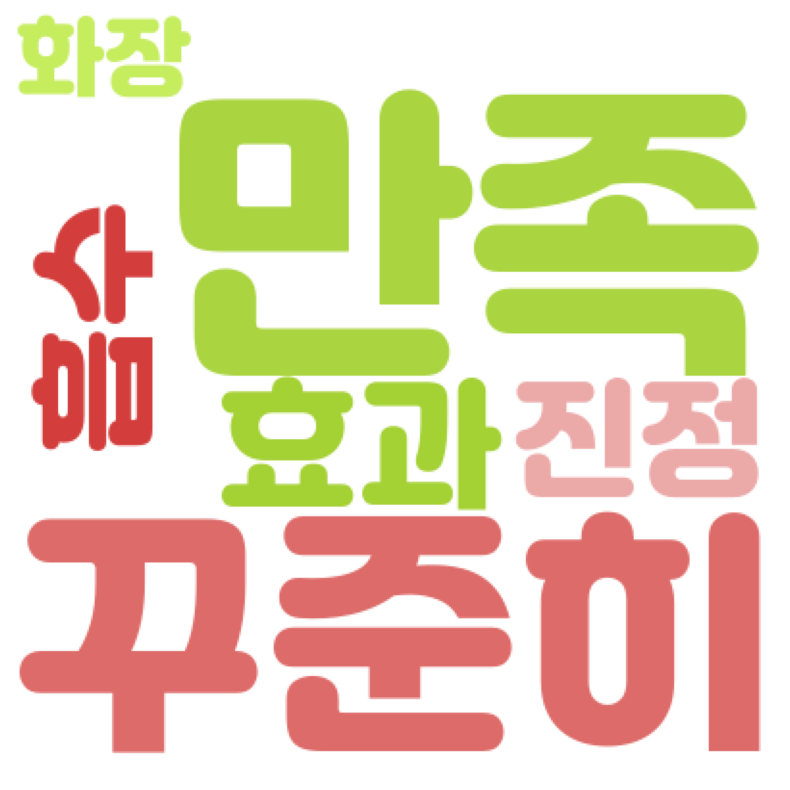

In [77]:
# 채택!!
import numpy as np
from wordcloud import WordCloud #워드클라우드 제작 라이브러리
import matplotlib.pyplot as plt  #워드클라우드 시각화 라이브러리

# 워드클라우드에서 각 단어에 적용할 색상을 결정하는 함수
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 색조(hue)를 50에서 100 사이의 랜덤 값으로 설정
    hue_choices = [77,1]    #np.random.randint(50, 100)   # 색상의 기본 톤
    hue = np.random.choice(hue_choices)
    # 채도(saturation)을 63, 80으로 지정
    saturation_choices = [63,80]
    saturation = np.random.choice(saturation_choices)
    
    # 밝기는 랜덤 범위로 설정
    lightness = np.random.randint(50, 80)   # 50%에서 80% 사이의 랜덤 밝기
    
    # hsl 형식으로 색상 값을 반환
    return f"hsl({hue}, {saturation}%, {lightness}%)"

font_path=r"C:\대학교\학생성장지원시스템\(탈잉)실무에 가장 많이 쓰는 PPT 디자인\Jalnan.ttf"

#wordcloud 함수 사용
wc = WordCloud(random_state=42,font_path= font_path , width = 400,
               height = 400, background_color = 'white', color_func = color_func )
img_wordcloud = wc.generate_from_frequencies(dic_word2)

plt.figure(figsize = (10, 10)) #크기 지정하기
plt.axis('off') #축 없애기
plt.imshow(img_wordcloud) #결과 보여주기
plt.savefig('Skincare_top_positive_wordcloud') #파일 저장